In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.font_manager

In [2]:
import yaml
from src.common.load_data import load_raw_data, load_processed_data, load_featurized_data
import os
from src.preprocess import Preprocessor
from src.common.logger import get_logger

In [12]:
plt.style.reload_library()
plt.style.use(['science','no-latex','grid',])

In [171]:
def plot_series(df,title,before=None, after=None, path='EDA/plot',figsize=(12,8)):
    df = df.copy()

    if before:
        df = df[df.index < before]
        print(before)
    if after:
        df = df[df.index > after]

    fig, ax = plt.subplots(figsize=figsize)
    sns.lineplot(data=df,x=df.index,y=df['val_cargaenergiamwmed'], ax=ax)
    ax.set_title(title)
    ax.set_ylabel('Carga em MW Médio')
    ax.set_xlabel('Data')
    plt.xticks(rotation=45)
    fig.savefig(path)
    plt.show()

In [221]:
def plot_decompose_series(df,before=None, after=None, path='EDA/plot',model='aditive',figsize=(12,18),sharex=True,week=False):
    df = df.copy()

    if before:
        df = df[df.index < before]
    if after:
        df = df[df.index > after]

    decompose_result_mult = seasonal_decompose(df.fillna(method='bfill').val_cargaenergiamwmed, model=model)

    fig = plt.figure(figsize=figsize)    
    gs = fig.add_gridspec(4, hspace=0.45)
    ax = gs.subplots(sharex=sharex)
    
    sns.lineplot(
        data=decompose_result_mult.observed,
        x=decompose_result_mult.observed.index,
        y=decompose_result_mult.observed.values, 
        ax=ax[0])
    ax[0].set_title(f'Carga média {"diária" if week == False else "semanal"} no subsistema "Sudeste"')
    ax[0].set_ylabel('Carga em MW Médio')
    ax[0].set_xlabel('Data')
    ax[0].tick_params(axis='x', rotation=30, labelsize=10)

    sns.lineplot(
        data=decompose_result_mult.trend,
        x=decompose_result_mult.trend.index,
        y=decompose_result_mult.trend.values, 
        ax=ax[1])
    ax[1].set_title("Decomposição da série - Linha de Tendência")
    ax[1].set_ylabel('Carga em MW Médio')
    ax[1].set_xlabel('Data')
    ax[1].tick_params(axis='x', rotation=30, labelsize=10)


    sns.lineplot(
        data=decompose_result_mult.seasonal,
        x=decompose_result_mult.seasonal.index,
        y=decompose_result_mult.seasonal.values, 
        ax=ax[2])
    ax[2].set_title("Decomposição da série - Sazonalidade")
    ax[2].set_ylabel('Carga em MW Médio')
    ax[2].set_xlabel('Data')
    ax[2].tick_params(axis='x', rotation=30, labelsize=10)


    sns.lineplot(
        data=decompose_result_mult.resid,
        x=decompose_result_mult.resid.index,
        y=decompose_result_mult.resid.values, 
        ax=ax[3])
    ax[3].set_title("Decomposição da série - Residuo")
    ax[3].set_ylabel('Carga em MW Médio')
    ax[3].set_xlabel('Data')
    ax[3].tick_params(axis='x', rotation=30, labelsize=10)


    fig.savefig(path)
    plt.show()



In [210]:
#df = load_processed_data()
df = load_raw_data(start=2000)

df = df[df['nom_subsistema']=="SUDESTE"].copy()
df.set_index('din_instante',inplace=True)


In [211]:
df['desloc'] = df.val_cargaenergiamwmed.shift(-1)
df['diff'] = df['desloc'] / df['val_cargaenergiamwmed']

# Em dias

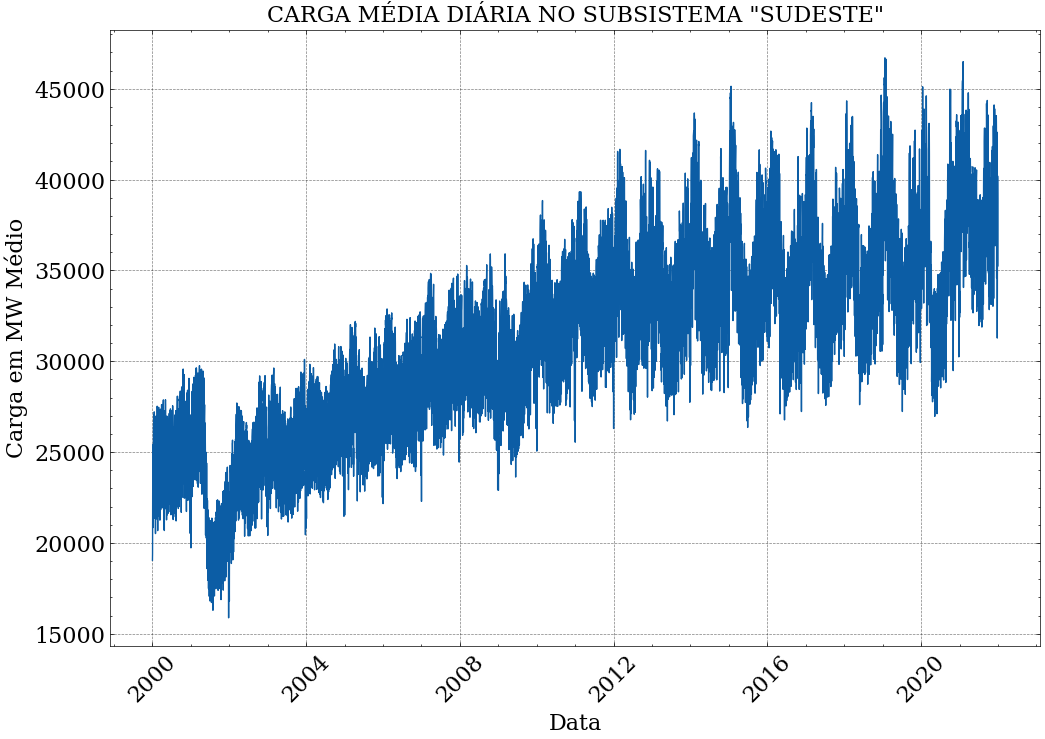

In [212]:
plot_series(
    df,
    path='EDA/plot serie diaria',
    title=('Carga média diária no subsistema "SUDESTE"').upper()
)

2019-03-01


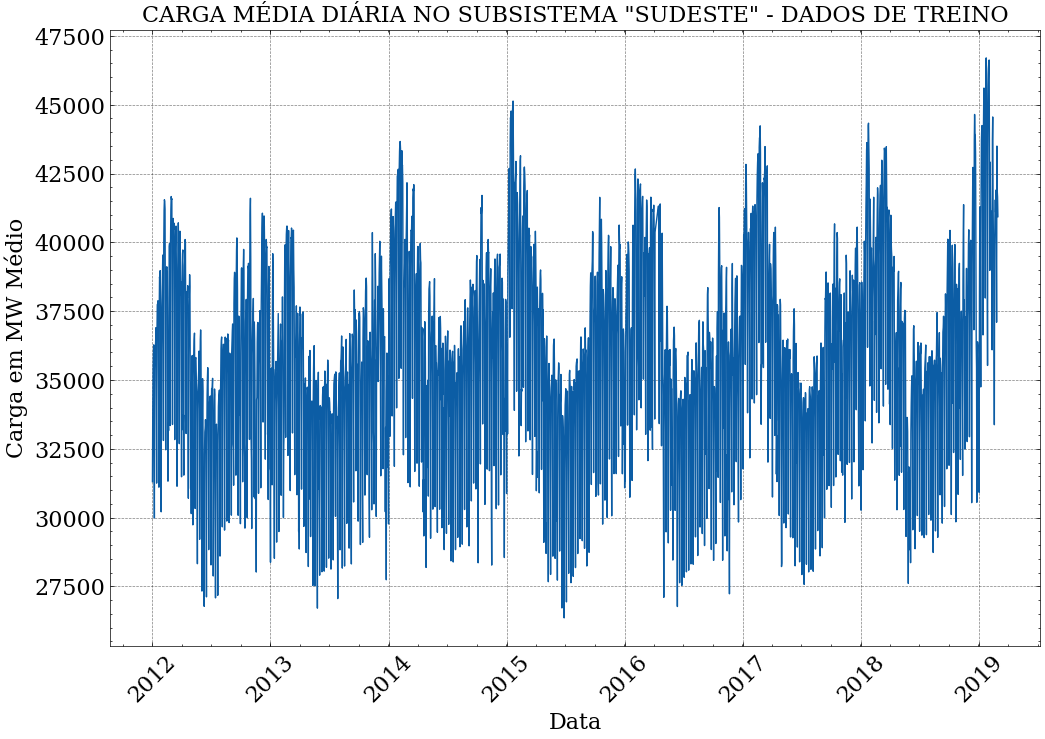

In [213]:
plot_series(
    df,
    after='2012-01-01', 
    before='2019-03-01',
    path='EDA/plot serie diaria dados de treino',
    title=('Carga média diária no subsistema "SUDESTE" - dados de Treino').upper()
)

2019-02-01


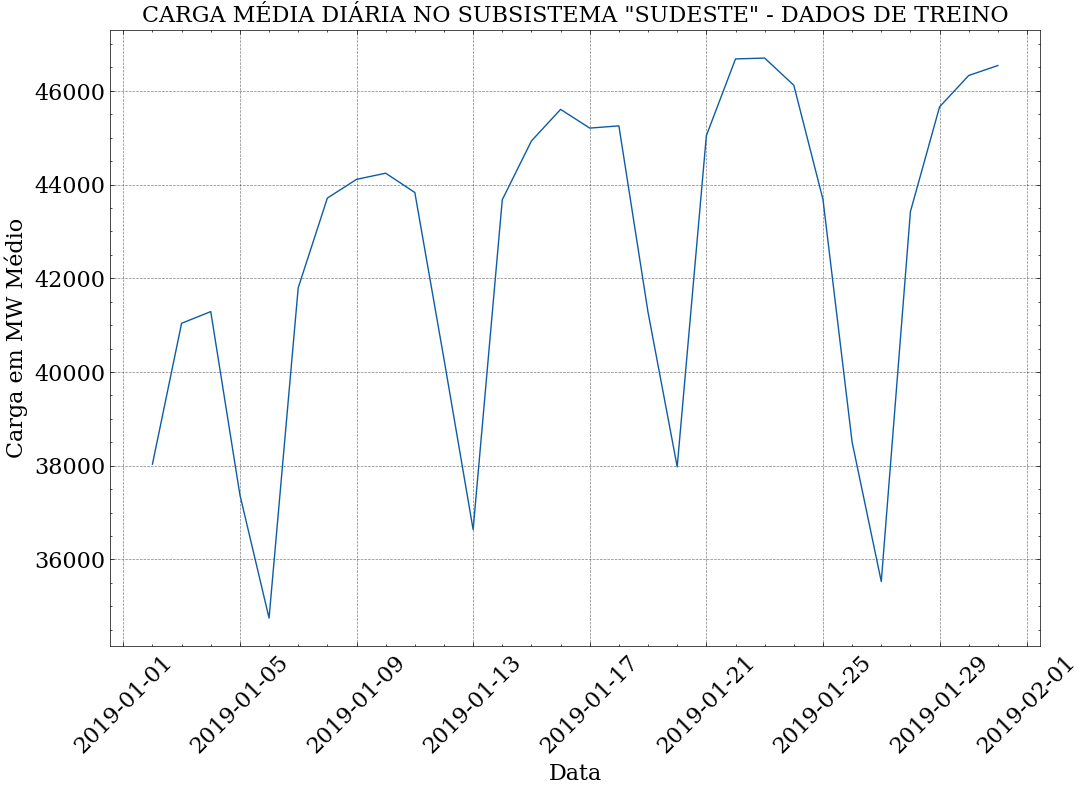

In [214]:
plot_series(
    df,
    after='2019-01-01', 
    before='2019-02-01',
    path='EDA/plot serie diaria dados de treino - 1 mês',
    title=('Carga média diária no subsistema "SUDESTE" - dados de Treino').upper()
)

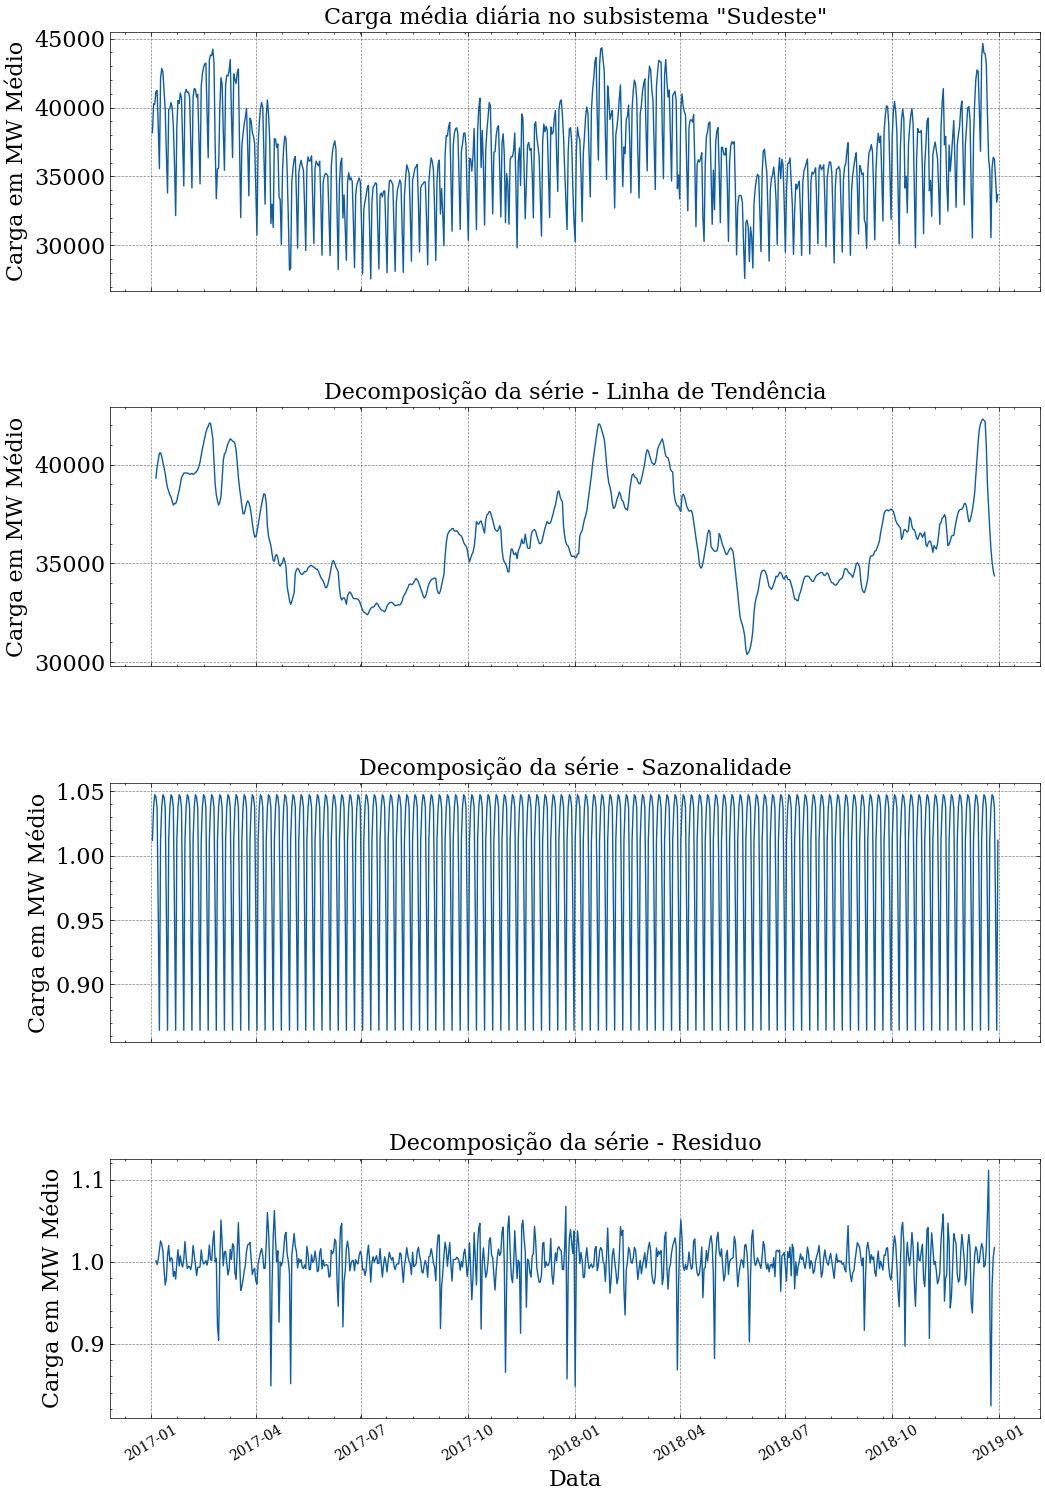

In [215]:
plot_decompose_series(
    df=df,
    after='2017-01-01', 
    before='2019-01-01',
    path='EDA/plot decompose serie diaria',
    model = 'multiplicative')

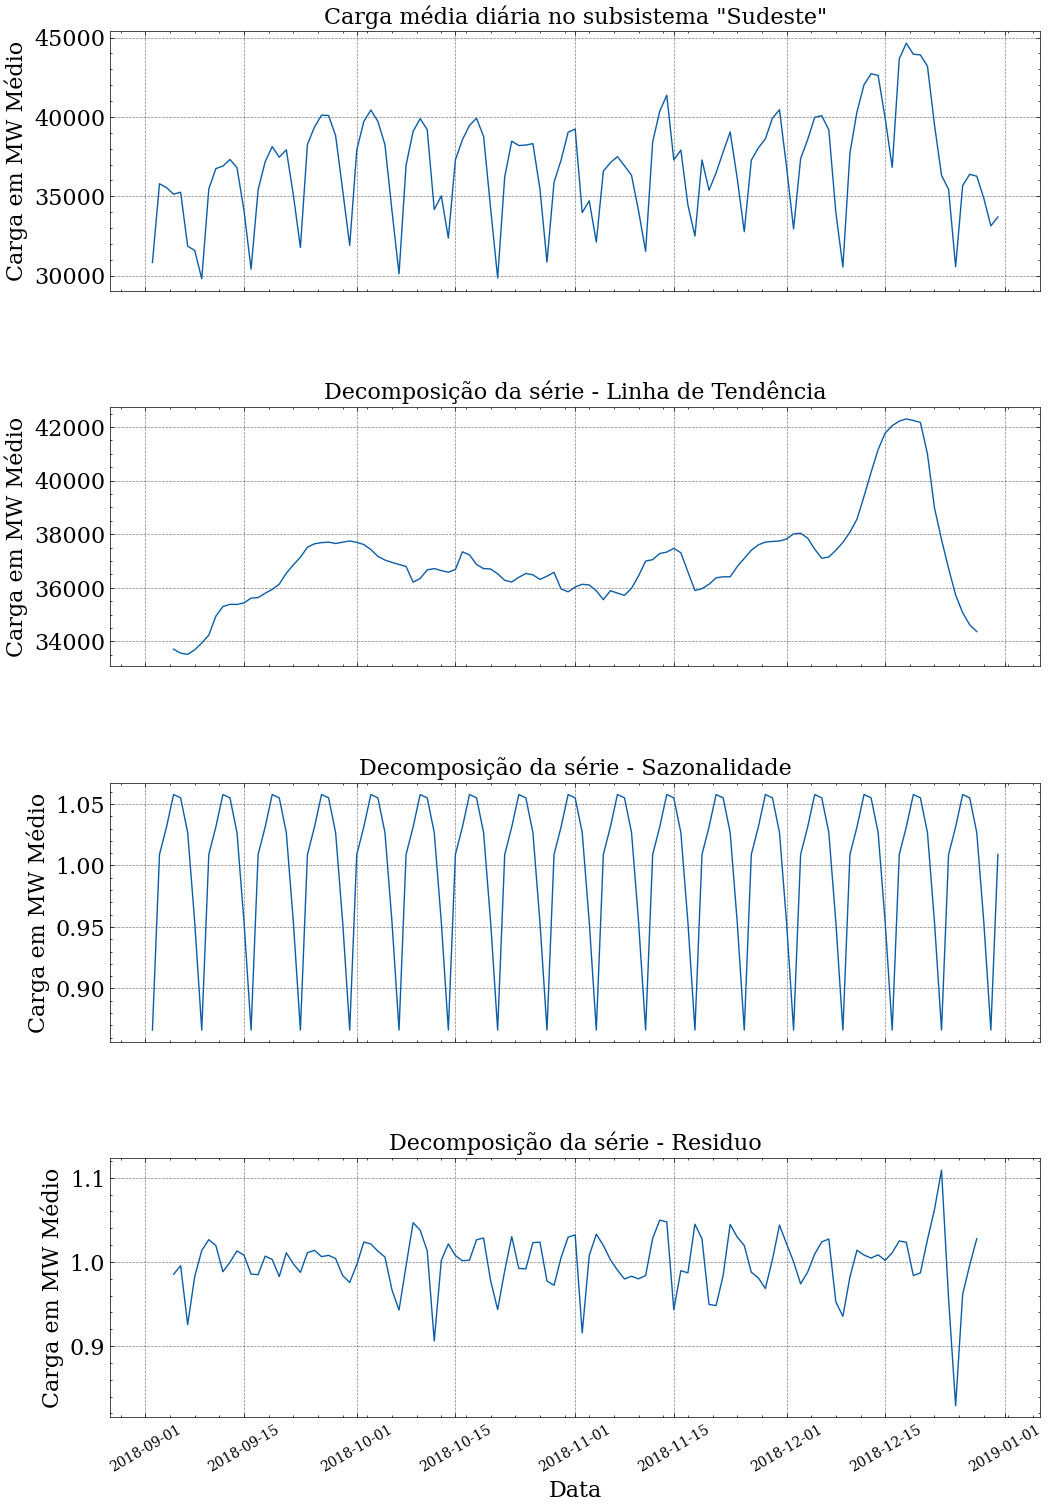

In [216]:
plot_decompose_series(
    df=df,
    after='2018-09-01', 
    before='2019-01-01',
    path='EDA/plot decompose serie diaria - 3 meses',
    model = 'multiplicative')

# Em semana

In [217]:
df_week = load_featurized_data()['train_pred'][0][['input semana 1']]
df_week.columns = ['val_cargaenergiamwmed']

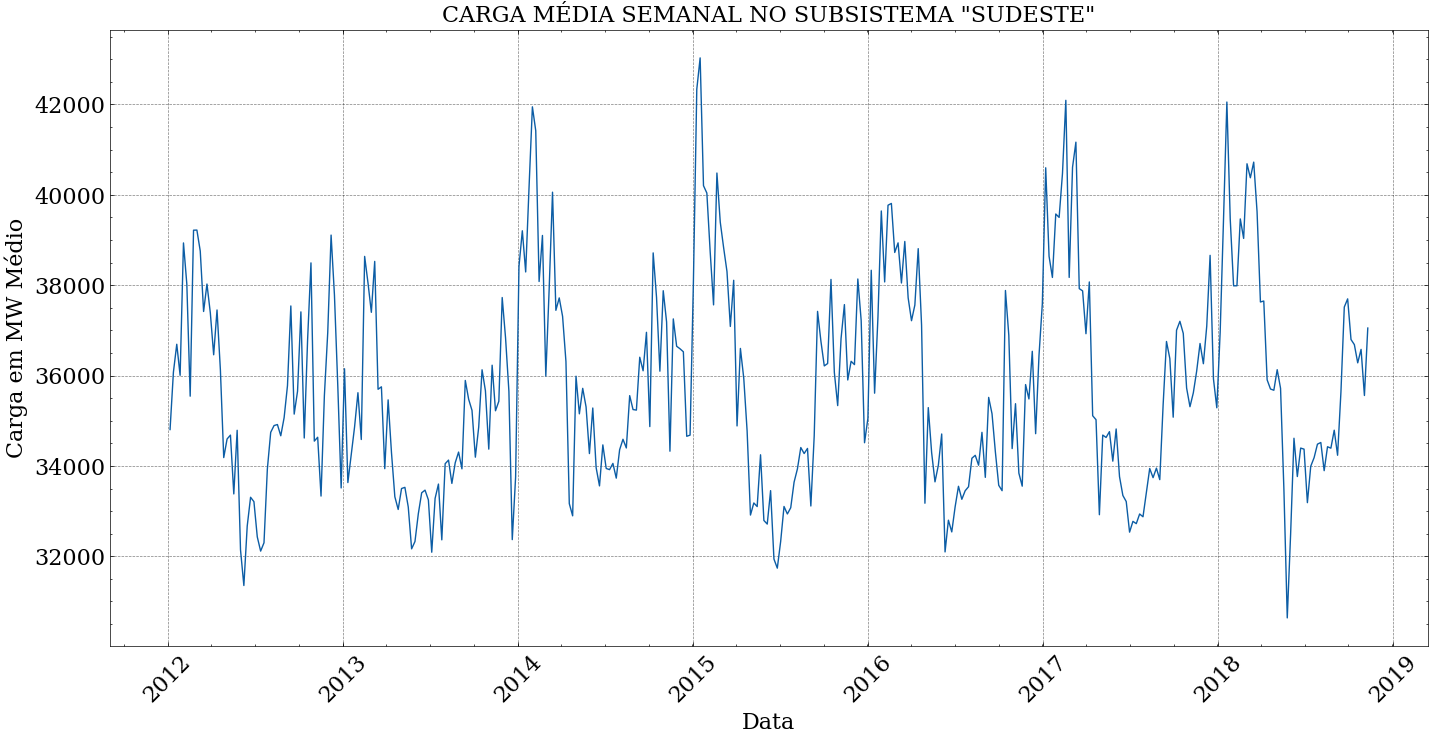

In [218]:
plot_series(
    df_week,
    path='EDA/plot serie semanal',
    title=('Carga média semanal no subsistema "SUDESTE"').upper(),
    figsize=(17,8)
)

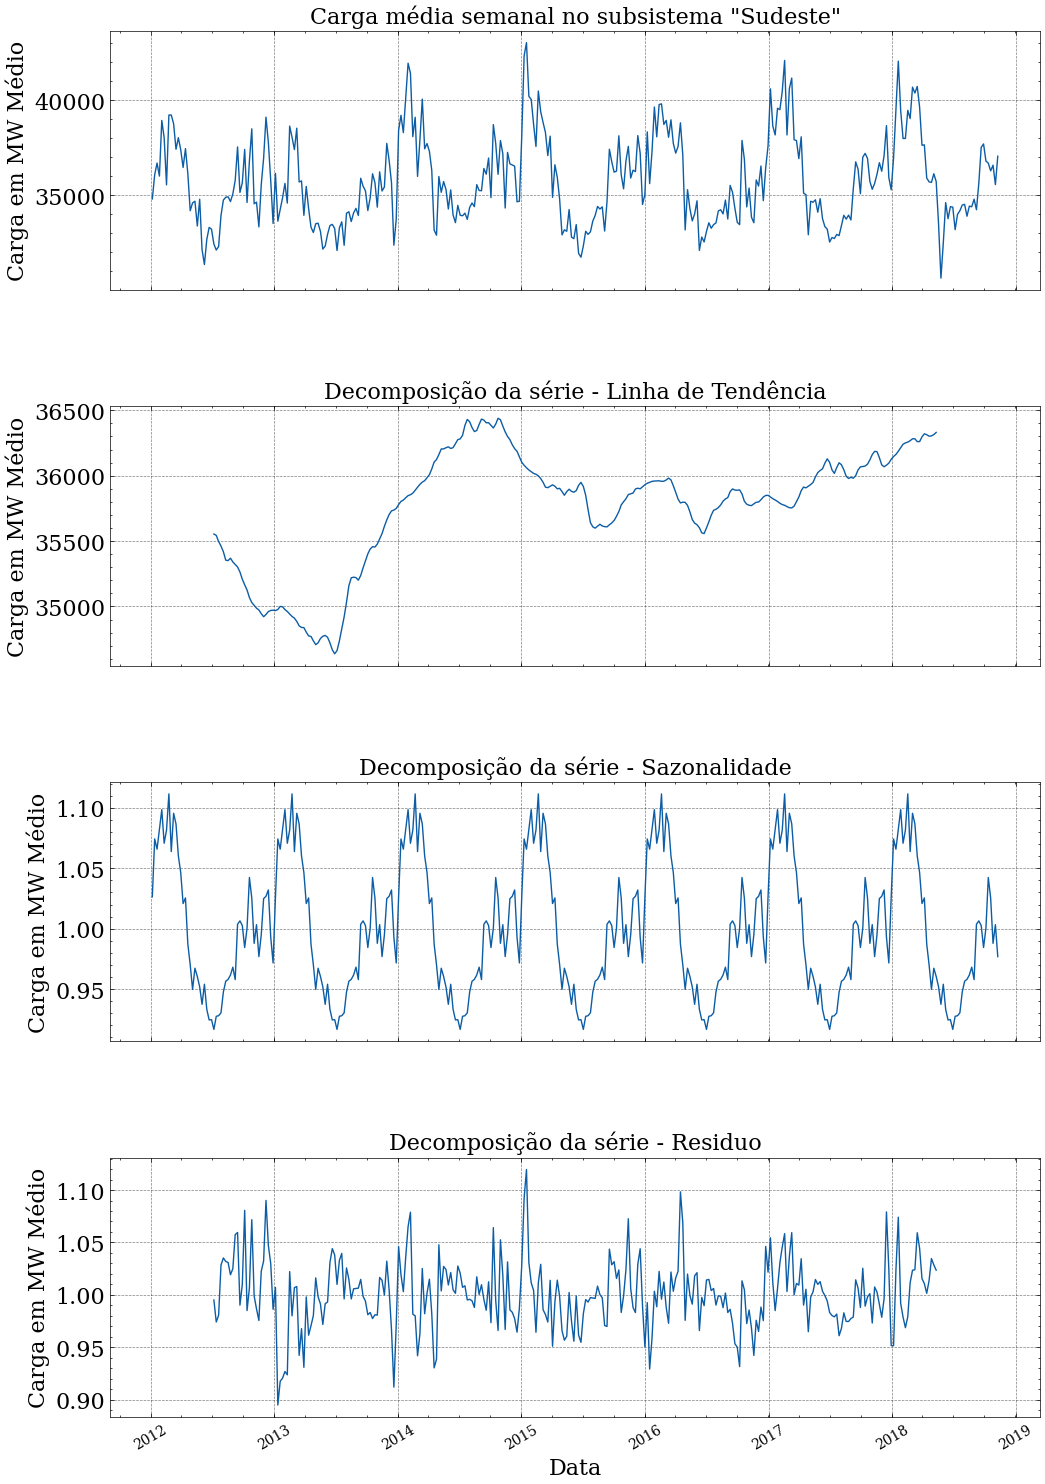

In [224]:
plot_decompose_series(
    df=df_week,
    after='2012-01-01', 
    before='2019-01-01',
    path='EDA/plot decompose serie semanal',
    model = 'multiplicative',
    sharex=True,
    week=True
)